In [1]:
import pandas as pd
from Bio import SeqIO
import numpy as np
from omics import omics
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pycirclize import Circos
from pycirclize.parser import Genbank
import glob

Data

In [2]:
prokka_minion006_tsv = pd.read_csv("../data/minion/PROKKA_11092023/PROKKA_11092023.tsv", sep = "\t")
prokka_illumina_tsv = pd.read_csv("../data/ilumina/PROKKA_11092023/PROKKA_11092023.tsv", sep = "\t")
annotated_clusters = pd.read_csv("../../annotated_clusters_inchikey_classified_KEGGpaired.csv")
compoundID_list = annotated_clusters.loc[annotated_clusters["metabolic pathway"] == "yes","KEGGID"].to_list()

In [3]:
annotated_clusters.loc[annotated_clusters["metabolic pathway"] == "yes"]

,cluster index,Precursor mass,InChI,Annotated method,InChIKey,Kingdom,Superclass,Class,KEGGID,metabolic pathway,which one
1,445,"284,1397",InChI=1S/C16H17N3O2/c20-15-14-6-3-7-19(14)16(2...,GNPS2,RYFZBPVMVYTEKZ-UHFFFAOYSA-N,Organic compounds,Organic acids and derivatives,Carboxylic acids and derivatives,cpd:C20563,yes,Staurosporine biosynthesis
3,512,"243,0878",InChI=1S/C12H10N4O2/c1-5-3-7-8(4-6(5)2)14-10-9...,GNPS2,ZJTJUVIJVLLGSP-UHFFFAOYSA-N,Organic compounds,Organoheterocyclic compounds,Pteridines and derivatives,cpd:C01727,yes,Riboflavin metabolism
4,542,"227,1751",InChI=1S/C12H22N2O2/c15-11-7-3-1-5-9-13-12(16)...,ChemWalker,HERSSAVMHCMYSQ-UHFFFAOYSA-N,Organic compounds,Phenylpropanoids and polyketides,Macrolactams,cpd:C04277,yes,Caprolactam degradation
5,542,"227,1751",InChI=1S/C12H22N2O2/c15-11-7-3-1-5-9-13-12(16)...,ChemWalker,HERSSAVMHCMYSQ-UHFFFAOYSA-N,Organic compounds,Phenylpropanoids and polyketides,Macrolactams,cpd:C20990,yes,Caprolactam degradation
6,563,"227,1753",InChI=1S/C12H22N2O2/c15-11-7-3-1-5-9-13-12(16)...,ChemWalker,HERSSAVMHCMYSQ-UHFFFAOYSA-N,Organic compounds,Phenylpropanoids and polyketides,Macrolactams,cpd:C04277,yes,Caprolactam degradation
7,563,"227,1753",InChI=1S/C12H22N2O2/c15-11-7-3-1-5-9-13-12(16)...,ChemWalker,HERSSAVMHCMYSQ-UHFFFAOYSA-N,Organic compounds,Phenylpropanoids and polyketides,Macrolactams,cpd:C20990,yes,Caprolactam degradation
16,799,"201,1597",InChI=1S/C11H6O4/c12-10-2-1-6-9(15-10)5-8-7(11...,GNPS2,GIJHDGJRTUSBJR-UHFFFAOYSA-N,Organic compounds,Phenylpropanoids and polyketides,Coumarins and derivatives,cpd:C00758,yes,Biosynthesis of phenylpropanoids
17,902,"201,1625",InChI=1S/C11H6O4/c12-10-2-1-6-9(15-10)5-8-7(11...,GNPS2,GIJHDGJRTUSBJR-UHFFFAOYSA-N,Organic compounds,Phenylpropanoids and polyketides,Coumarins and derivatives,cpd:C00758,yes,Biosynthesis of phenylpropanoids
21,1035,"579,2923",InChI=1S/C27H30O14/c1-10-20(32)22(34)24(36)26(...,GNPS2,RPMNUQRUHXIGHK-UHFFFAOYSA-N,Organic compounds,Phenylpropanoids and polyketides,Flavonoids,cpd:C12627,yes,Flavone and flavonol biosynthesis
26,1644,"369,2313",InChI=1S/C20H32O6/c1-2-3-4-7-14(21)10-11-16-17...,ChemWalker,ROUDCKODIMKLNO-UHFFFAOYSA-N,Organic compounds,Lipids and lipid-like molecules,Fatty Acyls,cpd:C05962,yes,Arachidonic acid metabolism


In [4]:
for c in compoundID_list:
    print(omics.map_from_compound(c))

{'map00404': 'Staurosporine biosynthesis', 'map01100': 'Metabolic pathways', 'map01110': 'Biosynthesis of secondary metabolites'}
{'map00740': 'Riboflavin metabolism'}
{'map00930': 'Caprolactam degradation', 'map01120': 'Microbial metabolism in diverse environments'}
{'map00930': 'Caprolactam degradation', 'map01120': 'Microbial metabolism in diverse environments'}
{'map00930': 'Caprolactam degradation', 'map01120': 'Microbial metabolism in diverse environments'}
{'map00930': 'Caprolactam degradation', 'map01120': 'Microbial metabolism in diverse environments'}
{'map00999': 'Biosynthesis of various plant secondary metabolites', 'map01061': 'Biosynthesis of phenylpropanoids', 'map01110': 'Biosynthesis of secondary metabolites'}
{'map00999': 'Biosynthesis of various plant secondary metabolites', 'map01061': 'Biosynthesis of phenylpropanoids', 'map01110': 'Biosynthesis of secondary metabolites'}
{'map00944': 'Flavone and flavonol biosynthesis'}
{'map00590': 'Arachidonic acid metabolism', 

In [5]:
kos_dict = {}
for c in compoundID_list:
    try:
        kos_dict[c] = [omics.ko_from_map(k) for k in omics.map_from_compound(c).keys()]
    except:
        kos_dict[c] = "No KO_PATHWAY"

In [6]:
kos_dict 

{'cpd:C20563': ['ko00404', 'ko01100', 'ko01110'],
 'cpd:C01727': ['ko00740'],
 'cpd:C04277': ['ko00930', 'ko01120'],
 'cpd:C20990': ['ko00930', 'ko01120'],
 'cpd:C00758': 'No KO_PATHWAY',
 'cpd:C12627': ['ko00944'],
 'cpd:C05962': ['ko00590', 'ko01100'],
 'cpd:C01301': ['ko00120', 'ko01100']}

In [7]:
#Get KO that in commum with prokka
ko00404 = omics.enzymes_from_pathway("ko00404", "#65e8b4")
ko00740 = omics.enzymes_from_pathway("ko00740", "#65e8b4")
ko00930 = omics.enzymes_from_pathway("ko00930", "#65e8b4")
ko00944 = omics.enzymes_from_pathway("ko00944", "#65e8b4")
ko00590 = omics.enzymes_from_pathway("ko00590", "#65e8b4")
ko00120 = omics.enzymes_from_pathway("ko00120", "#65e8b4")

In [8]:
def features_from_gbk(gbk_file, contig_name):
    contig_length = {}
    for record in SeqIO.parse(gbk_file, "genbank"):
        contig_length[record.id] = int(len(record))
    contids_list = list(contig_length.keys())


    strand = []
    locus = []
    start_cds = []
    end_cds = []
    for record in SeqIO.parse(gbk_file, "genbank"):
        contig_id = record.id
        for feature in record.features:
            if feature.type == "CDS":
                locus.append(feature.qualifiers["locus_tag"][0]) #tag
                strand.append(feature.location.strand) # tape sense
                #Start and end adjusted by contig length
                start = feature.location.start.position +1 
                end = feature.location.end.position - 1
                contig_index = contids_list.index(contig_id) + 1

                start_adjusted = start + sum(contig_length[f"{contig_name}{c}"] for c in range(1,contig_index))
                end_adjusted = end + sum(contig_length[f"{contig_name}{c}"] for c in range(1,contig_index))
                start_cds.append(start_adjusted)
                end_cds.append(end_adjusted)

    df_info = pd.DataFrame({
        "locus_tag":locus,
        "strand":strand,
        "start":start_cds,
        "end":end_cds
    })
    return df_info

In [9]:
outdir = "../pathways"
cp_list = [x.lstrip("cpd:") for x in compoundID_list]

In [10]:
pathway_KOs = ["ko00404","ko00740","ko00930","ko00944","ko00590","ko00120"]
Minion_KOs = [x.merge(prokka_minion006_tsv, on = "EC_number") for x in [ko00404,ko00740,ko00930,ko00944,ko00590,ko00120]]
Illumina_KOs = [x.merge(prokka_illumina_tsv, on = "EC_number") for x in [ko00404,ko00740,ko00930,ko00944,ko00590,ko00120]]


In [11]:
for paths,kos in zip(pathway_KOs,Minion_KOs):
    omics.draw_pathway(
        paths,
        outdir,
        kos.KEGG_NODE_LABEL.to_list(),
        cp_list)

In [32]:
#Enzymes in pathways
prokka_minion_gbk = features_from_gbk("../data/minion/PROKKA_11092023/PROKKA_11092023.gbk","contig_")
prokka_illumina_gbk = features_from_gbk("../data/ilumina/PROKKA_11092023/PROKKA_11092023.gbk","Scaffold_")

prokka_tsv_gbk_minion = prokka_minion006_tsv.merge(prokka_minion_gbk, on = "locus_tag")
minion_kegg_enzymes = prokka_tsv_gbk_minion.merge(ko00404, on = "EC_number").drop_duplicates(subset=["locus_tag"])

prokka_tsv_gbk_illumina = prokka_illumina_tsv.merge(prokka_illumina_gbk, on = "locus_tag")
illumina_kegg_enzymes = prokka_tsv_gbk_illumina.merge(ko00404, on = "EC_number").drop_duplicates(subset=["locus_tag"])

In [33]:
illumina_kegg_enzymes.head()

,locus_tag,ftype,length_bp,gene,EC_number,COG,product,strand,start,end,KEGG_NODE_LABEL,KEGG_NODE_FILL_COLOR
0,OPPBIMDH_00075,CDS,729,NaN,1.-.-.-,NaN,putative oxidoreductase,-1,77666,78393,K21294,#65e8b4
1,OPPBIMDH_00335,CDS,243,NaN,1.-.-.-,COG0695,Putative glutaredoxin.1,1,412812,413053,K21294,#65e8b4
2,OPPBIMDH_00452,CDS,1119,NaN,1.-.-.-,COG0516,putative oxidoreductase/MSMEI_1564,-1,543091,544208,K21294,#65e8b4
3,OPPBIMDH_00726,CDS,765,NaN,1.-.-.-,COG4221,putative oxidoreductase,1,814105,814868,K21294,#65e8b4
4,OPPBIMDH_00789,CDS,1401,NaN,1.-.-.-,COG0277,putative FAD-linked oxidoreductase,1,872419,873818,K21294,#65e8b4


In [34]:
#Search enzymes with EC number 6.3.2.-" -> NRPK
minion_kegg_enzymes.loc[minion_kegg_enzymes.EC_number == "6.3.2.-"]

,locus_tag,ftype,length_bp,gene,EC_number,COG,product,strand,start,end,KEGG_NODE_LABEL,KEGG_NODE_FILL_COLOR
67,ONHDLDEL_10776,CDS,192,dhbE,6.3.2.-,COG1021,"2,3-dihydroxybenzoate-AMP ligase",1,6516714,6516904,K18281,#65e8b4
69,ONHDLDEL_10848,CDS,993,mbtB_1,6.3.2.-,COG1020,Phenyloxazoline synthase MbtB,-1,6566899,6567890,K18281,#65e8b4
71,ONHDLDEL_10854,CDS,1182,mbtB_2,6.3.2.-,NaN,Phenyloxazoline synthase MbtB,-1,6574255,6575435,K18281,#65e8b4


In [35]:
minion_bgc_candidate = minion_kegg_enzymes.loc[(minion_kegg_enzymes.start > 6_416_714)&(minion_kegg_enzymes.end < 6_675_435)]
minion_bgc_candidate

,locus_tag,ftype,length_bp,gene,EC_number,COG,product,strand,start,end,KEGG_NODE_LABEL,KEGG_NODE_FILL_COLOR
25,ONHDLDEL_10735,CDS,171,NaN,1.-.-.-,COG1018,NADPH oxidoreductase,-1,6488893,6489062,K21294,#65e8b4
26,ONHDLDEL_10736,CDS,411,NaN,1.-.-.-,COG1018,NADPH oxidoreductase,-1,6489143,6489552,K21294,#65e8b4
37,ONHDLDEL_10650,CDS,777,NaN,2.1.1.-,COG0500,putative methyltransferase,1,6441359,6442134,K20081,#65e8b4
39,ONHDLDEL_10691,CDS,468,trmO,2.1.1.-,COG1720,tRNA (adenine(37)-N6)-methyltransferase,1,6462415,6462881,K20081,#65e8b4
62,ONHDLDEL_10789,CDS,435,thcB_1,1.14.-.-,NaN,Cytochrome P450 116,-1,6524418,6524851,K20080,#65e8b4
63,ONHDLDEL_10790,CDS,387,thcB_2,1.14.-.-,NaN,Cytochrome P450 116,-1,6525075,6525460,K20080,#65e8b4
64,ONHDLDEL_10796,CDS,831,NaN,1.14.-.-,COG2124,Putative cytochrome P450 135B1,-1,6530369,6531198,K20080,#65e8b4
65,ONHDLDEL_10809,CDS,618,yjiB,1.14.-.-,COG2124,Putative cytochrome P450 YjiB,-1,6539513,6540129,K20080,#65e8b4
67,ONHDLDEL_10776,CDS,192,dhbE,6.3.2.-,COG1021,"2,3-dihydroxybenzoate-AMP ligase",1,6516714,6516904,K18281,#65e8b4
69,ONHDLDEL_10848,CDS,993,mbtB_1,6.3.2.-,COG1020,Phenyloxazoline synthase MbtB,-1,6566899,6567890,K18281,#65e8b4


In [36]:
illumina_kegg_enzymes.loc[illumina_kegg_enzymes.EC_number == "6.3.2.-"]

,locus_tag,ftype,length_bp,gene,EC_number,COG,product,strand,start,end,KEGG_NODE_LABEL,KEGG_NODE_FILL_COLOR
66,OPPBIMDH_02712,CDS,1365,ipuC,6.3.2.-,NaN,Glutamate--isopropylamine ligase,1,2862923,2864286,K18281,#65e8b4
68,OPPBIMDH_05713,CDS,1605,dhbE,6.3.2.-,COG1021,"2,3-dihydroxybenzoate-AMP ligase",1,6223129,6224732,K18281,#65e8b4


In [37]:
illu_bgc_candidate = illumina_kegg_enzymes.loc[(illumina_kegg_enzymes.start > 6_123_129)&(illumina_kegg_enzymes.end < 6_324_732)]
illu_bgc_candidate

,locus_tag,ftype,length_bp,gene,EC_number,COG,product,strand,start,end,KEGG_NODE_LABEL,KEGG_NODE_FILL_COLOR
27,OPPBIMDH_05688,CDS,1092,NaN,1.-.-.-,COG1018,NADPH oxidoreductase,-1,6195295,6196385,K21294,#65e8b4
28,OPPBIMDH_05695,CDS,831,ucpA,1.-.-.-,NaN,Oxidoreductase UcpA,1,6203824,6204653,K21294,#65e8b4
39,OPPBIMDH_05671,CDS,999,gpr_2,1.1.1.-,COG0667,L-glyceraldehyde 3-phosphate reductase,1,6173735,6174732,K20085,#65e8b4
68,OPPBIMDH_05713,CDS,1605,dhbE,6.3.2.-,COG1021,"2,3-dihydroxybenzoate-AMP ligase",1,6223129,6224732,K18281,#65e8b4
75,OPPBIMDH_05721,CDS,1281,thcB_2,1.14.-.-,NaN,Cytochrome P450 116,-1,6231024,6232303,K20080,#65e8b4
76,OPPBIMDH_05725,CDS,1380,NaN,1.14.-.-,COG2124,Putative cytochrome P450 135B1,-1,6236991,6238369,K20080,#65e8b4
77,OPPBIMDH_05732,CDS,1224,yjiB,1.14.-.-,COG2124,Putative cytochrome P450 YjiB,-1,6246216,6247438,K20080,#65e8b4
78,OPPBIMDH_05749,CDS,1251,NaN,1.14.-.-,COG2124,Cytochrome P450 107B1,1,6264771,6266020,K20080,#65e8b4
79,OPPBIMDH_05757,CDS,1203,pksS,1.14.-.-,COG2124,Polyketide biosynthesis cytochrome P450 PksS,1,6283483,6284684,K20080,#65e8b4
84,OPPBIMDH_05687,CDS,1140,desA3,1.14.19.-,COG3239,NADPH-dependent stearoyl-CoA 9-desaturase,-1,6194141,6195279,K14257,#65e8b4


In [44]:
# # LOCATE ALL BGCs components
bgcs_paths = glob.glob("../BGC/minion/contig_*")
bgcs_df = pd.DataFrame()
for file in bgcs_paths:
    for record in SeqIO.parse(file,"genbank"):
        prot = []
        name = []
        for feature in record.features:
            if feature.type == "CDS":
                prot.append(feature.qualifiers["locus_tag"][0])
                name.append(file.split("/")[-1])
        df = pd.DataFrame({"Id":name,"locus_tag":prot})
    bgcs_df = pd.concat([bgcs_df,df], axis = 0)
#Set colors for each BGCs
colors = cm.get_cmap("tab10",len(bgcs_df.Id.unique()))
region_colors = dict(zip(bgcs_df.Id.unique(),colors(range(len(bgcs_df.Id.unique())))))
bgcs_df["color"] = bgcs_df["Id"].map(region_colors)
bgcs_df = bgcs_df.merge(prokka_minion_gbk, on = "locus_tag")

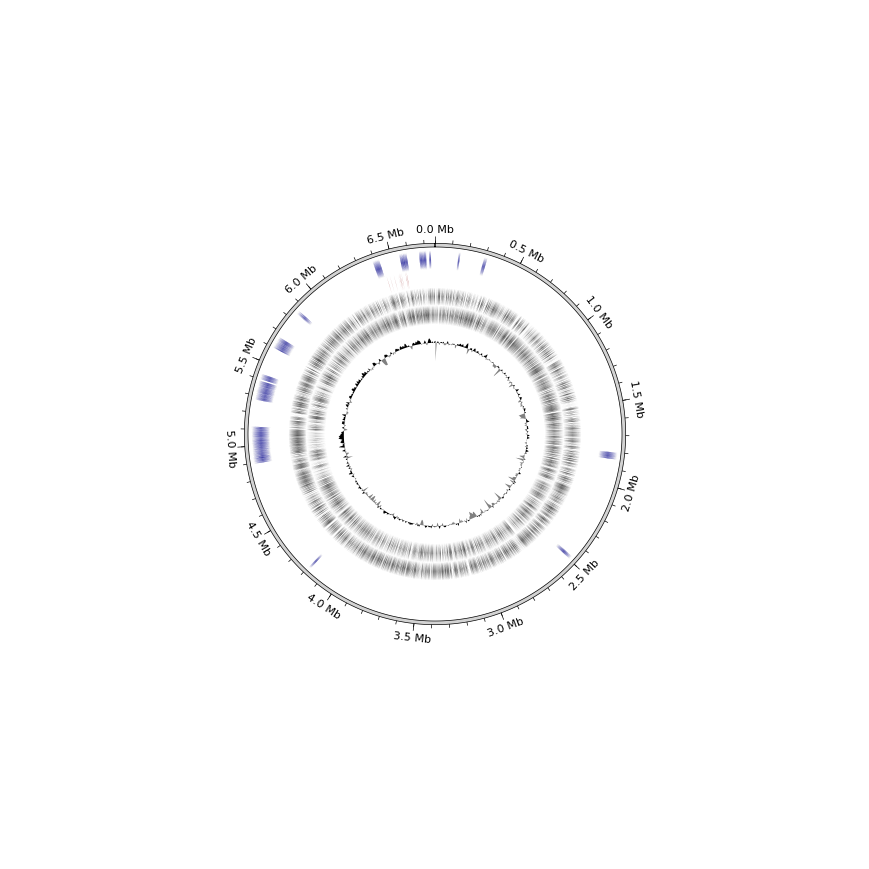

In [45]:
gbk = Genbank("../data/minion/PROKKA_11092023/PROKKA_11092023.gbk")


circos = Circos(sectors={gbk.name: gbk.range_size})
circos.text(" ", size=15)
sector = circos.sectors[0]

# Plot outer track with xticks
major_ticks_interval = 500000
minor_ticks_interval = 100000
outer_track = sector.add_track((51, 52))
outer_track.axis(fc="lightgrey")
outer_track.xticks_by_interval(
    major_ticks_interval, label_formatter=lambda v: f"{v/ 10 ** 6:.1f} Mb"
)
outer_track.xticks_by_interval(minor_ticks_interval, tick_length=1, show_label=False)



#pathways minion
path_ko_minion = sector.add_track((40,45))
path_ko_minion.axis(fc="none", ec="none")
for info in minion_bgc_candidate.itertuples():
    match info.strand:
        case 1:
            path_ko_minion.arrow(start = info.start, end = info.end, color = "darkred")
        case -1:
            path_ko_minion.arrow(start = info.start, end = info.end, color = "darkred")

# #BGCS CIRCOS MINION
bgcs_track = sector.add_track((45,50))
bgcs_track.axis(fc="none", ec="none")
for info in bgcs_df.itertuples():
        match info.strand:
            case 1:
                bgcs_track.arrow(start=info.start,end=info.end, color = "darkblue")
            case -1:
                bgcs_track.arrow(start=info.end, end=info.start, color = "darkblue")

#Predicted CDS
cds_forward = sector.add_track((35,40))
cds_forward.axis(fc="none", ec="none")
for info in prokka_minion_gbk.itertuples():
     if info.strand == 1:
          cds_forward.arrow(start = info.start, end = info.end, color = "black")

          
cds_reverse = sector.add_track((30,35))
cds_reverse.axis(fc="none", ec="none")
for info in prokka_minion_gbk.itertuples():
     if info.strand == -1:
          cds_reverse.arrow(start = info.end, end = info.start, color = "black")



gc_content_track = sector.add_track((20, 30))
pos_list, gc_contents = gbk.calc_gc_content()
gc_contents = gc_contents - gbk.calc_genome_gc_content()
positive_gc_contents = np.where(gc_contents > 0, gc_contents, 0)
negative_gc_contents = np.where(gc_contents < 0, gc_contents, 0)
abs_max_gc_content = np.max(np.abs(gc_contents))
vmin, vmax = -abs_max_gc_content, abs_max_gc_content
gc_content_track.fill_between(
    pos_list, positive_gc_contents, 0, vmin=vmin, vmax=vmax, color="black"
)
gc_content_track.fill_between(
    pos_list, negative_gc_contents, 0, vmin=vmin, vmax=vmax, color="grey"
)

fig = circos.plotfig().savefig("../figs/BRA006_minion_circular.svg",format = "svg")

In [40]:
# # LOCATE ALL BGCs components
bgcs_paths = glob.glob("../BGC/illumina/Scaffold_*")
bgcs_df = pd.DataFrame()
for file in bgcs_paths:
    for record in SeqIO.parse(file,"genbank"):
        prot = []
        name = []
        for feature in record.features:
            if feature.type == "CDS":
                prot.append(feature.qualifiers["locus_tag"][0])
                name.append(file.split("/")[-1])
        df = pd.DataFrame({"Id":name,"locus_tag":prot})
    bgcs_df = pd.concat([bgcs_df,df], axis = 0)
#Set colors for each BGCs
# colors = cm.get_cmap("tab10",len(bgcs_df.Id.unique()))
# region_colors = dict(zip(bgcs_df.Id.unique(),colors(range(len(bgcs_df.Id.unique())))))
# bgcs_df["color"] = bgcs_df["Id"].map(region_colors)
bgcs_df_illumina = bgcs_df.merge(prokka_illumina_gbk, on = "locus_tag")

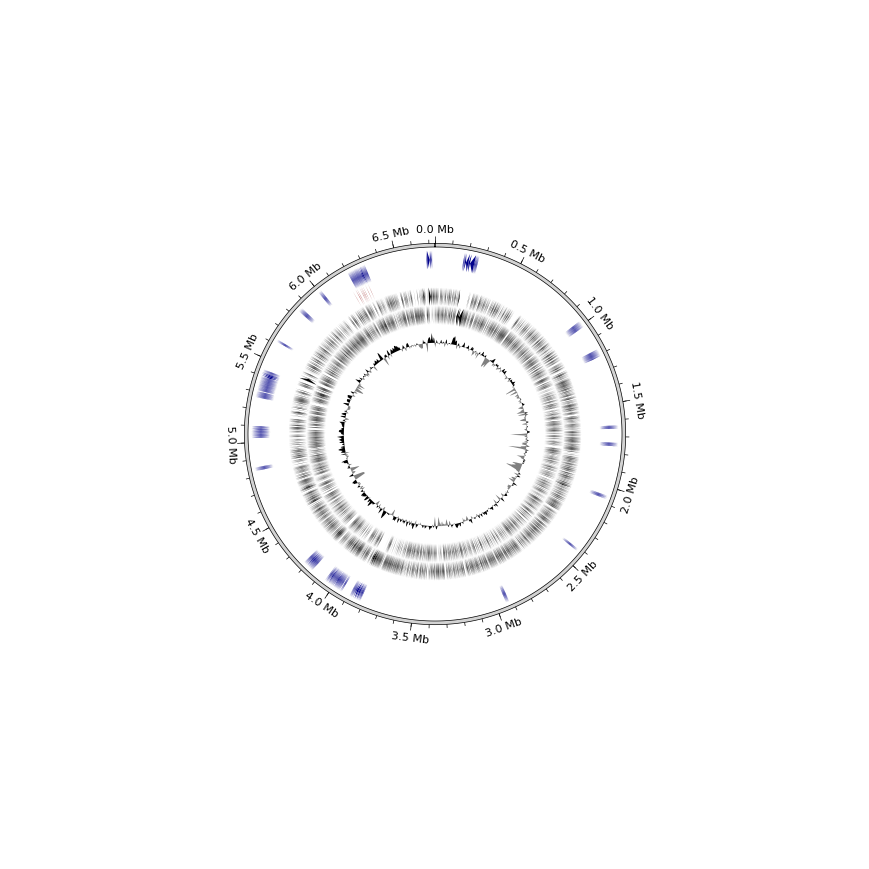

In [46]:
gbk = Genbank("../data/ilumina/PROKKA_11092023/PROKKA_11092023.gbk")


circos = Circos(sectors={gbk.name: gbk.range_size})
circos.text(" ", size=15)
sector = circos.sectors[0]

# Plot outer track with xticks
major_ticks_interval = 500000
minor_ticks_interval = 100000
outer_track = sector.add_track((51, 52))
outer_track.axis(fc="lightgrey")
outer_track.xticks_by_interval(
    major_ticks_interval, label_formatter=lambda v: f"{v/ 10 ** 6:.1f} Mb"
)
outer_track.xticks_by_interval(minor_ticks_interval, tick_length=1, show_label=False)



#pathways Illumina
path_ko_illumina = sector.add_track((40,45))
path_ko_illumina.axis(fc="none", ec="none")
for info in illu_bgc_candidate.itertuples():
    match info.strand:
        case 1:
            path_ko_illumina.arrow(start = info.start, end = info.end, color = "darkred")
        case -1:
            path_ko_illumina.arrow(start = info.start, end = info.end, color = "darkred")

# #BGCS CIRCOS MINION
bgcs_track = sector.add_track((45,50))
bgcs_track.axis(fc="none", ec="none")
for info in bgcs_df_illumina.itertuples():
        match info.strand:
            case 1:
                bgcs_track.arrow(start=info.start,end=info.end, color = "darkblue")
            case -1:
                bgcs_track.arrow(start=info.end, end=info.start, color = "darkblue")


#Predicted CDS
cds_forward = sector.add_track((35,40))
cds_forward.axis(fc="none", ec="none")
for info in prokka_illumina_gbk.itertuples():
     if info.strand == 1:
          cds_forward.arrow(start = info.start, end = info.end, color = "black")          
cds_reverse = sector.add_track((30,35))
cds_reverse.axis(fc="none", ec="none")
for info in prokka_illumina_gbk.itertuples():
     if info.strand == -1:
          cds_reverse.arrow(start = info.end, end = info.start, color = "black")



gc_content_track = sector.add_track((20, 30))
pos_list, gc_contents = gbk.calc_gc_content()
gc_contents = gc_contents - gbk.calc_genome_gc_content()
positive_gc_contents = np.where(gc_contents > 0, gc_contents, 0)
negative_gc_contents = np.where(gc_contents < 0, gc_contents, 0)
abs_max_gc_content = np.max(np.abs(gc_contents))
vmin, vmax = -abs_max_gc_content, abs_max_gc_content
gc_content_track.fill_between(
    pos_list, positive_gc_contents, 0, vmin=vmin, vmax=vmax, color="black"
)
gc_content_track.fill_between(
    pos_list, negative_gc_contents, 0, vmin=vmin, vmax=vmax, color="grey"
)

fig = circos.plotfig().savefig("../figs/BRA006_illumina_circular.svg",format = "svg")

In [42]:
bgcs_df[bgcs_df.locus_tag == "OPPBIMDH_05713"]

,Id,locus_tag
20,Scaffold_1.region020.gbk,OPPBIMDH_05713
